In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso ,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

In [5]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["Price"]=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
# checking null values are present or not
boston_df.isnull().sum()   

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
X = boston_df.drop(["Price"],axis=1)
y = boston_df["Price"]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor=DecisionTreeRegressor(max_depth=4)   # given max_depth=7,8,9,3,4

dt_regressor.fit(X_train,y_train)

score = dt_regressor.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_regressor.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("RMSE :",mse**(1/2.0))

R-squared Train  : 0.8857388736713648
R-squared Test  : 0.8646893116543823
MSE : 12.401831739709166
RMSE : 3.5216234522886127


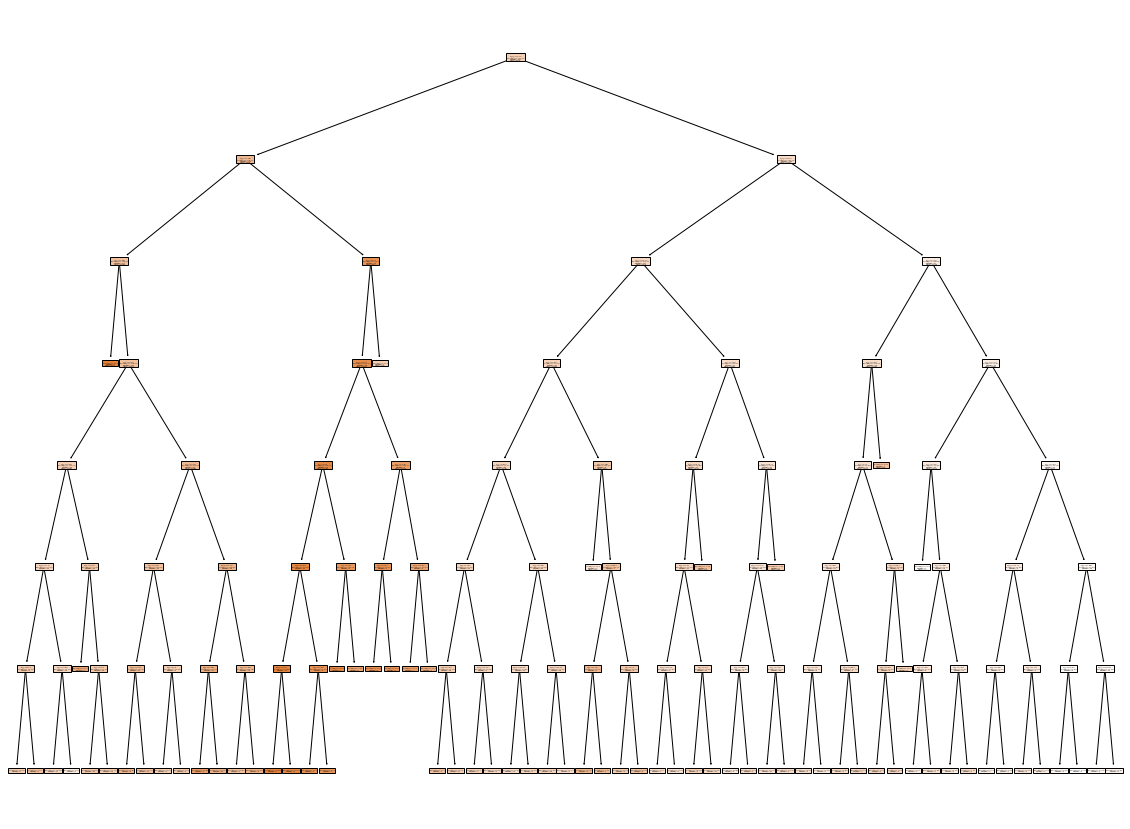

In [13]:
from sklearn import tree

plt.figure(figsize=(20,15))

tree.plot_tree(dt_regressor,filled=True,class_names=True)
plt.show()